In [1]:
import pandas as pd 
import numpy as np
import statistics
import matplotlib.pyplot as plt
import seaborn as sns

# Coallating NCAA Player Dataset



## Loading in Parsed Datasets

In [2]:
per_game_raw_stats_df = pd.read_csv('/content/drive/Shareddrives/CS229_Final_Project_Data/NCAA_Data/ncaa_per_game_stats.csv')
per_game_raw_stats_df = per_game_raw_stats_df[per_game_raw_stats_df['MP']>15].reset_index(drop=True)
per_game_raw_stats_df

,Player Name,G,GS,MP,FG,FGA,FG%,2P,2PA,2P%,...,TRB,AST,STL,BLK,TOV,PF,PTS,SOS,ORB,DRB
0,Pervis Ellison,31.0,30.0,32.7,7.3,11.9,0.615,7.3,11.9,0.617,...,8.7,2.5,1.3,3.2,2.7,3.2,17.6,9.28,NaN,NaN
1,Danny Ferry,35.0,35.0,33.2,8.6,16.4,0.522,7.3,13.4,0.544,...,7.4,4.7,1.6,0.6,3.3,2.5,22.6,8.20,NaN,NaN
2,Sean Elliott,33.0,33.0,34.1,7.2,15.0,0.480,5.2,10.4,0.499,...,7.2,4.1,1.0,0.3,3.1,1.6,22.3,10.26,NaN,NaN
3,Glen Rice,37.0,37.0,34.0,9.8,17.0,0.577,7.1,11.8,0.604,...,6.3,2.3,1.1,0.3,2.2,2.0,25.6,12.06,NaN,NaN
4,JR Reid,27.0,16.0,26.5,6.1,9.9,0.614,6.1,9.9,0.614,...,6.3,1.3,0.9,0.8,2.6,3.0,15.9,12.41,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1499,Bones Hyland,24.0,24.0,31.9,6.3,14.2,0.447,3.5,6.4,0.539,...,4.7,2.1,1.9,0.2,3.1,2.2,19.5,4.76,0.2,4.5
1500,Cam Thomas,29.0,29.0,34.0,7.0,17.2,0.406,4.7,10.0,0.464,...,3.4,1.4,0.9,0.2,1.7,1.4,23.0,9.14,0.6,2.8
1501,Day'Ron Sharpe,29.0,4.0,19.2,3.9,7.4,0.519,3.9,7.4,0.523,...,7.6,1.4,0.8,0.9,2.0,2.0,9.5,9.52,3.3,4.2
1502,Greg Brown III,26.0,24.0,20.6,3.1,7.4,0.420,2.0,3.9,0.500,...,6.2,0.4,0.6,1.0,2.3,3.0,9.3,9.36,1.2,5.0


In [3]:
per_game_raw_stats_df.isnull().sum()

Player Name      0
G                0
GS              96
MP               0
FG               0
FGA              0
FG%              0
2P              12
2PA             12
2P%             12
3P              12
3PA             12
3P%            165
FT               0
FTA              0
FT%              0
TRB              0
AST              0
STL              0
BLK              0
TOV              7
PF               3
PTS              0
SOS             88
ORB            567
DRB            567
dtype: int64

In [4]:
per_game_advanced_stats_df = pd.read_csv('/content/drive/Shareddrives/CS229_Final_Project_Data/NCAA_Data/ncaa_advanced_stats.csv')
per_game_advanced_stats_df

,Player Name,G,GS,MP,TS%,eFG%,3PAr,FTr,TOV%,TRB%,...,ORB%,DRB%,STL%,OWS,DWS,WS,WS/40,OBPM,DBPM,BPM
0,Pervis Ellison,31.0,30.0,1014.0,0.626,0.615,0.003,0.382,16.3,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Danny Ferry,35.0,35.0,1163.0,0.593,0.561,0.184,0.336,14.7,12.7,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Sean Elliott,33.0,33.0,1125.0,0.608,0.547,0.306,0.470,14.6,12.2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Glen Rice,37.0,37.0,1258.0,0.678,0.656,0.305,0.237,10.4,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,JR Reid,27.0,16.0,716.0,0.633,0.614,0.000,0.566,17.3,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1561,Bones Hyland,24.0,24.0,766.0,0.596,0.549,0.547,0.321,15.9,8.9,...,0.7,16.3,3.5,2.0,1.8,3.8,0.201,5.5,2.7,8.2
1562,Cam Thomas,29.0,29.0,986.0,0.553,0.474,0.418,0.440,7.5,5.2,...,2.0,8.2,1.4,4.0,0.5,4.5,0.183,7.1,-0.8,6.3
1563,Day'Ron Sharpe,29.0,4.0,556.0,0.521,0.519,0.009,0.468,17.8,20.9,...,18.1,23.8,2.3,1.1,1.2,2.3,0.169,4.3,3.2,7.5
1564,Greg Brown III,26.0,24.0,535.0,0.535,0.497,0.472,0.373,20.9,16.8,...,6.7,26.0,1.6,0.3,1.2,1.5,0.113,-0.2,2.7,2.5


In [5]:
per_game_advanced_stats_df.isnull().sum()

Player Name       0
G                 1
GS              102
MP                9
TS%               3
eFG%             20
3PAr             19
FTr               4
TOV%            108
TRB%            755
AST%            755
BLK%            755
USG%            756
PER            1060
PProd          1012
ORB%           1012
DRB%           1012
STL%           1007
OWS             383
DWS             383
WS              383
WS/40           391
OBPM           1063
DBPM           1063
BPM            1063
dtype: int64

In [6]:
per_game_40_min_stats_df = pd.read_csv('/content/drive/Shareddrives/CS229_Final_Project_Data/NCAA_Data/ncaa_per_40_min_stats.csv')
per_game_40_min_stats_df

,Player Name,G,GS,MP,FG,FGA,FG%,2P,2PA,2P%,...,FTA,FT%,TRB,AST,STL,BLK,TOV,PF,PTS,3P%
0,Shawn Kemp,27.0,26.0,709.0,6.2,10.2,0.608,6.2,10.2,0.608,...,4.1,0.597,5.4,0.3,0.4,1.1,1.7,3.6,14.8,NaN
1,Greg Grant,21.0,16.0,487.0,4.7,11.2,0.419,4.7,11.2,0.419,...,3.4,0.548,11.2,2.4,0.4,1.9,3.4,5.2,11.3,NaN
2,AJ English,28.0,28.0,1005.0,7.6,17.5,0.433,3.8,7.4,0.519,...,7.5,0.836,5.6,6.9,1.8,0.6,4.0,2.4,25.2,0.370
3,Kenny Williams,3.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,0.250,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Myron Brown,13.0,1.0,129.0,2.2,3.4,0.636,2.2,3.4,0.636,...,0.9,1.000,7.8,0.6,0.6,0.0,2.5,7.8,5.3,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1343,Bones Hyland,24.0,24.0,766.0,7.9,17.8,0.447,4.3,8.0,0.539,...,5.7,0.862,5.9,2.6,2.3,0.2,3.9,2.8,24.4,0.371
1344,Cam Thomas,29.0,29.0,986.0,8.2,20.3,0.406,5.5,11.8,0.464,...,8.9,0.882,4.0,1.7,1.0,0.2,2.0,1.6,27.1,0.325
1345,Day'Ron Sharpe,29.0,4.0,556.0,8.1,15.5,0.519,8.1,15.4,0.523,...,7.3,0.505,15.8,3.0,1.7,1.9,4.1,4.2,19.8,0.000
1346,Greg Brown III,26.0,24.0,535.0,6.1,14.4,0.420,3.8,7.6,0.500,...,5.4,0.708,12.0,0.7,1.1,1.9,4.5,5.8,18.2,0.330


In [7]:
per_game_40_min_stats_df.isnull().sum()

Player Name      0
G                0
GS              40
MP               6
FG               6
FGA              6
FG%              3
2P               6
2PA              7
2P%              3
3P               6
3PA              7
FT               6
FTA              6
FT%              2
TRB              6
AST              6
STL              6
BLK              6
TOV             12
PF               9
PTS              6
3P%            145
dtype: int64

In [8]:
per_game_100_poss_stats_df = pd.read_csv('/content/drive/Shareddrives/CS229_Final_Project_Data/NCAA_Data/ncaa_per_game_stats.csv')
per_game_100_poss_stats_df

,Player Name,G,GS,MP,FG,FGA,FG%,2P,2PA,2P%,...,TRB,AST,STL,BLK,TOV,PF,PTS,SOS,ORB,DRB
0,Pervis Ellison,31.0,30.0,32.7,7.3,11.9,0.615,7.3,11.9,0.617,...,8.7,2.5,1.3,3.2,2.7,3.2,17.6,9.28,NaN,NaN
1,Danny Ferry,35.0,35.0,33.2,8.6,16.4,0.522,7.3,13.4,0.544,...,7.4,4.7,1.6,0.6,3.3,2.5,22.6,8.20,NaN,NaN
2,Sean Elliott,33.0,33.0,34.1,7.2,15.0,0.480,5.2,10.4,0.499,...,7.2,4.1,1.0,0.3,3.1,1.6,22.3,10.26,NaN,NaN
3,Glen Rice,37.0,37.0,34.0,9.8,17.0,0.577,7.1,11.8,0.604,...,6.3,2.3,1.1,0.3,2.2,2.0,25.6,12.06,NaN,NaN
4,JR Reid,27.0,16.0,26.5,6.1,9.9,0.614,6.1,9.9,0.614,...,6.3,1.3,0.9,0.8,2.6,3.0,15.9,12.41,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1561,Bones Hyland,24.0,24.0,31.9,6.3,14.2,0.447,3.5,6.4,0.539,...,4.7,2.1,1.9,0.2,3.1,2.2,19.5,4.76,0.2,4.5
1562,Cam Thomas,29.0,29.0,34.0,7.0,17.2,0.406,4.7,10.0,0.464,...,3.4,1.4,0.9,0.2,1.7,1.4,23.0,9.14,0.6,2.8
1563,Day'Ron Sharpe,29.0,4.0,19.2,3.9,7.4,0.519,3.9,7.4,0.523,...,7.6,1.4,0.8,0.9,2.0,2.0,9.5,9.52,3.3,4.2
1564,Greg Brown III,26.0,24.0,20.6,3.1,7.4,0.420,2.0,3.9,0.500,...,6.2,0.4,0.6,1.0,2.3,3.0,9.3,9.36,1.2,5.0


In [9]:
per_game_100_poss_stats_df.isnull().sum()

Player Name      0
G                1
GS             102
MP               9
FG               1
FGA              1
FG%              4
2P              17
2PA             18
2P%             19
3P              17
3PA             18
3P%            189
FT               1
FTA              1
FT%              3
TRB              1
AST              1
STL              2
BLK              2
TOV             14
PF               8
PTS              1
SOS            117
ORB            596
DRB            596
dtype: int64

## Aggregating PerGame + Advanced Stats into a single Dataframe

In [10]:
per_game_raw_stats_df = per_game_raw_stats_df.drop(['G','GS','MP','3P%','SOS','ORB','DRB'], axis=1) 
per_game_raw_stats_df

,Player Name,FG,FGA,FG%,2P,2PA,2P%,3P,3PA,FT,FTA,FT%,TRB,AST,STL,BLK,TOV,PF,PTS
0,Pervis Ellison,7.3,11.9,0.615,7.3,11.9,0.617,0.0,0.0,3.0,4.5,0.652,8.7,2.5,1.3,3.2,2.7,3.2,17.6
1,Danny Ferry,8.6,16.4,0.522,7.3,13.4,0.544,1.3,3.0,4.2,5.5,0.756,7.4,4.7,1.6,0.6,3.3,2.5,22.6
2,Sean Elliott,7.2,15.0,0.480,5.2,10.4,0.499,2.0,4.6,5.9,7.0,0.841,7.2,4.1,1.0,0.3,3.1,1.6,22.3
3,Glen Rice,9.8,17.0,0.577,7.1,11.8,0.604,2.7,5.2,3.4,4.0,0.832,6.3,2.3,1.1,0.3,2.2,2.0,25.6
4,JR Reid,6.1,9.9,0.614,6.1,9.9,0.614,0.0,0.0,3.7,5.6,0.669,6.3,1.3,0.9,0.8,2.6,3.0,15.9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1499,Bones Hyland,6.3,14.2,0.447,3.5,6.4,0.539,2.9,7.8,3.9,4.5,0.862,4.7,2.1,1.9,0.2,3.1,2.2,19.5
1500,Cam Thomas,7.0,17.2,0.406,4.7,10.0,0.464,2.3,7.2,6.7,7.6,0.882,3.4,1.4,0.9,0.2,1.7,1.4,23.0
1501,Day'Ron Sharpe,3.9,7.4,0.519,3.9,7.4,0.523,0.0,0.1,1.8,3.5,0.505,7.6,1.4,0.8,0.9,2.0,2.0,9.5
1502,Greg Brown III,3.1,7.4,0.420,2.0,3.9,0.500,1.2,3.5,2.0,2.8,0.708,6.2,0.4,0.6,1.0,2.3,3.0,9.3


In [11]:
per_game_advanced_stats_df = per_game_advanced_stats_df[['Player Name','TS%', 'eFG%','3PAr','FTr']]
per_game_advanced_stats_df

,Player Name,TS%,eFG%,3PAr,FTr
0,Pervis Ellison,0.626,0.615,0.003,0.382
1,Danny Ferry,0.593,0.561,0.184,0.336
2,Sean Elliott,0.608,0.547,0.306,0.470
3,Glen Rice,0.678,0.656,0.305,0.237
4,JR Reid,0.633,0.614,0.000,0.566
...,...,...,...,...,...
1561,Bones Hyland,0.596,0.549,0.547,0.321
1562,Cam Thomas,0.553,0.474,0.418,0.440
1563,Day'Ron Sharpe,0.521,0.519,0.009,0.468
1564,Greg Brown III,0.535,0.497,0.472,0.373


In [12]:
advanced_player_list = list(per_game_advanced_stats_df['Player Name'])

ts_list = []
efg_list = []
par_list = []
ftr_list = []


for player in per_game_raw_stats_df['Player Name']:
  player_index = advanced_player_list.index(player)
  player_data = per_game_advanced_stats_df.iloc[player_index]
  ts_list.append(player_data['TS%'])
  efg_list.append(player_data['eFG%'])
  par_list.append(player_data['3PAr'])
  ftr_list.append(player_data['FTr'])

per_game_raw_stats_df['TS%'] = ts_list
per_game_raw_stats_df['eFG%'] = efg_list
per_game_raw_stats_df['3PAr'] = par_list
per_game_raw_stats_df['FTr'] = ftr_list

per_game_raw_stats_df = per_game_raw_stats_df.dropna(subset=['2P'])

In [13]:
per_game_raw_stats_df.isnull().sum()

Player Name    0
FG             0
FGA            0
FG%            0
2P             0
2PA            0
2P%            0
3P             0
3PA            0
FT             0
FTA            0
FT%            0
TRB            0
AST            0
STL            0
BLK            0
TOV            6
PF             3
PTS            0
TS%            0
eFG%           0
3PAr           0
FTr            0
dtype: int64

In [14]:
ncaa_data = per_game_raw_stats_df

ncaa_data = ncaa_data.reset_index(drop=True)

ncaa_data

,Player Name,FG,FGA,FG%,2P,2PA,2P%,3P,3PA,FT,...,AST,STL,BLK,TOV,PF,PTS,TS%,eFG%,3PAr,FTr
0,Pervis Ellison,7.3,11.9,0.615,7.3,11.9,0.617,0.0,0.0,3.0,...,2.5,1.3,3.2,2.7,3.2,17.6,0.626,0.615,0.003,0.382
1,Danny Ferry,8.6,16.4,0.522,7.3,13.4,0.544,1.3,3.0,4.2,...,4.7,1.6,0.6,3.3,2.5,22.6,0.593,0.561,0.184,0.336
2,Sean Elliott,7.2,15.0,0.480,5.2,10.4,0.499,2.0,4.6,5.9,...,4.1,1.0,0.3,3.1,1.6,22.3,0.608,0.547,0.306,0.470
3,Glen Rice,9.8,17.0,0.577,7.1,11.8,0.604,2.7,5.2,3.4,...,2.3,1.1,0.3,2.2,2.0,25.6,0.678,0.656,0.305,0.237
4,JR Reid,6.1,9.9,0.614,6.1,9.9,0.614,0.0,0.0,3.7,...,1.3,0.9,0.8,2.6,3.0,15.9,0.633,0.614,0.000,0.566
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1487,Bones Hyland,6.3,14.2,0.447,3.5,6.4,0.539,2.9,7.8,3.9,...,2.1,1.9,0.2,3.1,2.2,19.5,0.596,0.549,0.547,0.321
1488,Cam Thomas,7.0,17.2,0.406,4.7,10.0,0.464,2.3,7.2,6.7,...,1.4,0.9,0.2,1.7,1.4,23.0,0.553,0.474,0.418,0.440
1489,Day'Ron Sharpe,3.9,7.4,0.519,3.9,7.4,0.523,0.0,0.1,1.8,...,1.4,0.8,0.9,2.0,2.0,9.5,0.521,0.519,0.009,0.468
1490,Greg Brown III,3.1,7.4,0.420,2.0,3.9,0.500,1.2,3.5,2.0,...,0.4,0.6,1.0,2.3,3.0,9.3,0.535,0.497,0.472,0.373


# Coallated NBA Player Data

1.   power (RAPTOR derivative)



## Parsing POWER Data

In [15]:
power_df = pd.read_csv('/content/drive/Shareddrives/CS229_Final_Project_Data/Labeled_Data/RAPTOR/power_rankings_new - power_rankings_new.csv')

power_df

,player_name,three_mp,three_raptor,power
0,Michael Jordan,3811.333333,11.496325,7.374656
1,LeBron James,3456.333333,11.338624,6.690510
2,Larry Bird,3877.000000,8.521148,6.337649
3,Stephen Curry,3330.666667,10.912976,6.327836
4,John Stockton,3368.666667,10.226623,6.161808
...,...,...,...,...
3566,Derrick Alston,885.666667,-8.458172,0.418295
3567,Loren Meyer,686.000000,-9.499928,0.391120
3568,Kevin Knox,2158.000000,-8.142225,0.204251
3569,Anzejs Pasecniks,221.500000,-33.370240,0.013817


#### Plotting Overall Distribution of Power Scores

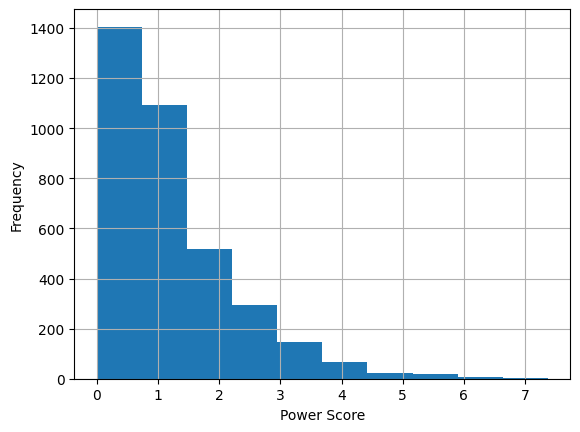

In [16]:
power_df['power'].hist()

# set labels for the x-axis and y-axis
plt.xlabel('Power Score')
plt.ylabel('Frequency')

# show the plot
plt.show()

# Classifying Player as Over/Under-performers
# Idea: If a player resides within the top 25th of the Power distribution of all players drafted in their same selection bin (since 1989) they are an overperformer. f a player resides within the bottom 25th of the Power distribution of all players drafted in their same selection bin (since 1989) they are an overperformer. Bins:


1.   Draft Picks: 1-10
2.   Draft Picks: 11-20
3.   Draft Picks: 21-30
4.   Draft Picks: 31-40
5.   Draft Picks: 41-60



### Note: Due to noisy Power data for players drafted in the bottom 15 slots, we only consider players drafted in the mid 2nd round upward (picks 1-45)

## Importing CSV detailing the Draft Selection Number of Each Player since 1989

In [17]:
picks_df = pd.read_csv('/content/drive/Shareddrives/CS229_Final_Project_Data/NCAA_Data/draft_picks_data.csv')
picks_df = picks_df.dropna(subset=['college']).reset_index(drop=True)
picks_df = picks_df[picks_df['year']>=2014].reset_index(drop=True)
picks_df = picks_df[['player','overall_pick']]
picks_df

,player,overall_pick
0,Andrew Wiggins,1
1,Jabari Parker,2
2,Joel Embiid,3
3,Aaron Gordon,4
4,Marcus Smart,6
...,...,...
384,Aaron Wiggins,55
385,Scottie Lewis,56
386,Balša Koprivica,57
387,Jericho Sims,58


## Collating Power Distributions w.r.t each Draft Selection Bin




1.   1-10 --> High First Round
2.   11-20 --> Mid First Round
3.   21-30 --> Late First Round
4.   31-40 --> Early Second Round
5.   41-60 --> Mid_Late Second Round





In [18]:
#define list of players in power df
power_players = [player.lower() for player in power_df['player_name']]

In [19]:
draft_slot_power_dist_dict = {'early_first':[],'mid_first':[],'late_first':[],'early_second':[],'mid_late_second':[]}

for player, pick_slot in zip(picks_df['player'], picks_df['overall_pick']):

    player = player.lower()

    if player in power_players:

      power_metric = power_df.iloc[power_players.index(player)]['power']

      if pick_slot in list(np.arange(1,11)):
        draft_slot_power_dist_dict['early_first'].append(power_metric)

      elif pick_slot in list(np.arange(11,21)):
        draft_slot_power_dist_dict['mid_first'].append(power_metric)

      elif pick_slot in list(np.arange(21,31)):
        draft_slot_power_dist_dict['late_first'].append(power_metric)

      elif pick_slot in list(np.arange(31,41)):
        draft_slot_power_dist_dict['early_second'].append(power_metric)

      elif pick_slot in list(np.arange(41,61)):
        draft_slot_power_dist_dict['mid_late_second'].append(power_metric)

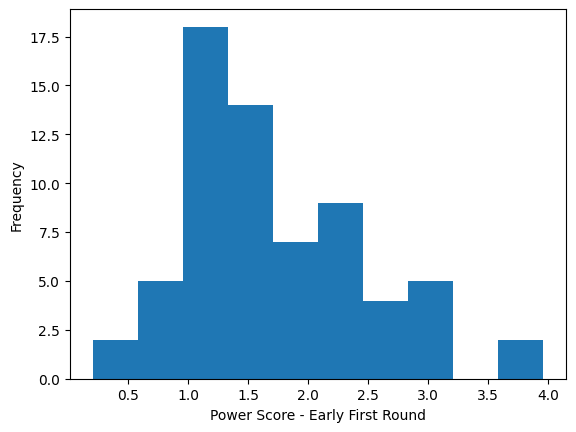

Power Mean across early first round picks: 1.7208749400121208
Power Std across early first round picks: 0.7783555354223596


In [20]:
plt.hist(draft_slot_power_dist_dict['early_first'])

# set labels for the x-axis and y-axis
plt.xlabel('Power Score - Early First Round')
plt.ylabel('Frequency')

# show the plot
plt.show()

power_mean = np.mean(draft_slot_power_dist_dict['early_first'])
power_stdev = statistics.stdev(draft_slot_power_dist_dict['early_first'])

print(f'Power Mean across early first round picks: {power_mean}')
print(f'Power Std across early first round picks: {power_stdev}')

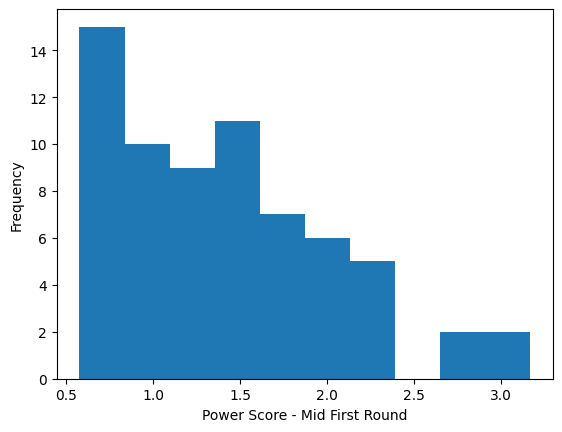

Power Mean across mid first round picks: 1.4012530516686568
Power Std across mid first round picks: 0.6286716249153171


In [21]:
plt.hist(draft_slot_power_dist_dict['mid_first'])

# set labels for the x-axis and y-axis
plt.xlabel('Power Score - Mid First Round')
plt.ylabel('Frequency')

# show the plot
plt.show()

power_mean = np.mean(draft_slot_power_dist_dict['mid_first'])
power_stdev = statistics.stdev(draft_slot_power_dist_dict['mid_first'])

print(f'Power Mean across mid first round picks: {power_mean}')
print(f'Power Std across mid first round picks: {power_stdev}')

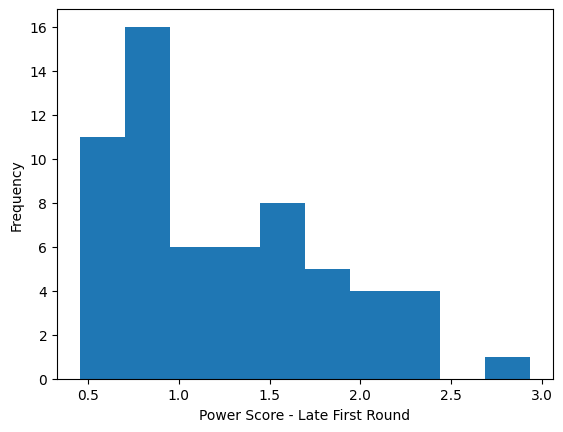

Power Mean across Late first round picks: 1.2643286306
Power Std across Late first round picks: 0.5758194229035264


In [22]:
plt.hist(draft_slot_power_dist_dict['late_first'])

# set labels for the x-axis and y-axis
plt.xlabel('Power Score - Late First Round')
plt.ylabel('Frequency')

# show the plot
plt.show()

power_mean = np.mean(draft_slot_power_dist_dict['late_first'])
power_stdev = statistics.stdev(draft_slot_power_dist_dict['late_first'])

print(f'Power Mean across Late first round picks: {power_mean}')
print(f'Power Std across Late first round picks: {power_stdev}')

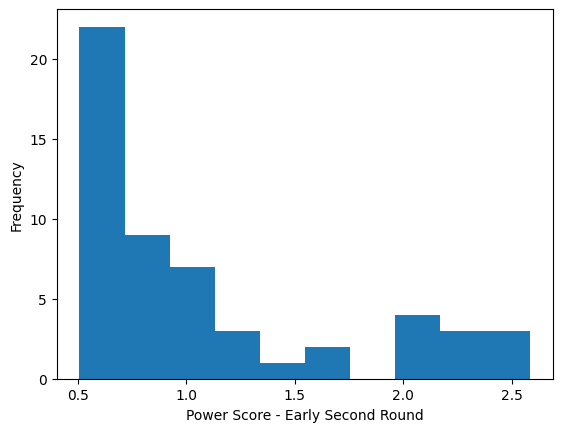

Power Mean across Early second round picks: 1.1017909671703703
Power Std across Early second round picks: 0.612930416365519


In [23]:
plt.hist(draft_slot_power_dist_dict['early_second'])

# set labels for the x-axis and y-axis
plt.xlabel('Power Score - Early Second Round')
plt.ylabel('Frequency')

# show the plot
plt.show()

power_mean = np.mean(draft_slot_power_dist_dict['early_second'])
power_stdev = statistics.stdev(draft_slot_power_dist_dict['early_second'])

print(f'Power Mean across Early second round picks: {power_mean}')
print(f'Power Std across Early second round picks: {power_stdev}')

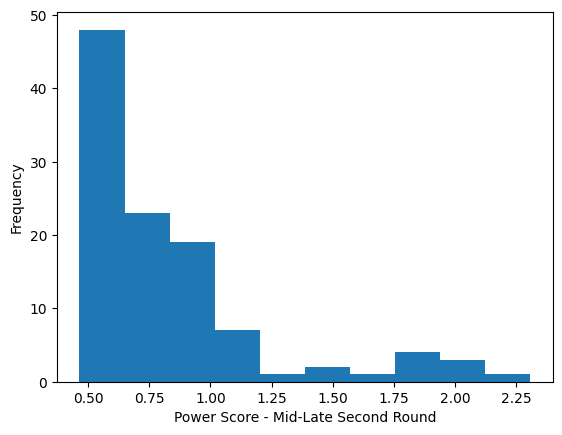

Power Mean across Mid-Late second round picks: 0.8448772345788989
Power Std across Mid-Late second round picks: 0.3763145862237932


In [24]:
plt.hist(draft_slot_power_dist_dict['mid_late_second'])

# set labels for the x-axis and y-axis
plt.xlabel('Power Score - Mid-Late Second Round')
plt.ylabel('Frequency')

# show the plot
plt.show()

power_mean = np.mean(draft_slot_power_dist_dict['mid_late_second'])
power_stdev = statistics.stdev(draft_slot_power_dist_dict['mid_late_second'])

print(f'Power Mean across Mid-Late second round picks: {power_mean}')
print(f'Power Std across Mid-Late second round picks: {power_stdev}')

## Classifying NCAA Players with Assocaited Power Metrics as underperformers (1) or Non-Underperformers (0)

In [25]:
player_performance_dict = {}

num_underperformers = 0

for player, pick_slot in zip(picks_df['player'], picks_df['overall_pick']):

    player = player.lower()

    if player in power_players:

      power_metric = power_df.iloc[power_players.index(player)]['power']

      if pick_slot in list(np.arange(1,11)):

        draft_pick_power_dist = draft_slot_power_dist_dict['early_first']

      elif pick_slot in list(np.arange(11,21)):

        draft_pick_power_dist = draft_slot_power_dist_dict['mid_first']

      elif pick_slot in list(np.arange(21,31)):

        draft_pick_power_dist = draft_slot_power_dist_dict['late_first']

      elif pick_slot in list(np.arange(31,41)):

        draft_pick_power_dist = draft_slot_power_dist_dict['early_second']

      elif pick_slot in list(np.arange(41,61)):

        draft_pick_power_dist = draft_slot_power_dist_dict['mid_late_second']

      if power_metric <= np.percentile(draft_pick_power_dist, 25):
        player_performance_dict[player] = 1
        num_underperformers+=1
      else:
        player_performance_dict[player] = 0

print(f'{num_underperformers}/{len(player_performance_dict)} players were classified as underperformers')

92/356 players were classified as underperformers


### Creating a Dataframe where:

*   Label Value '1' --> Player is an underperformer
*   Label Value '0' --> Player is a non underperformer




In [26]:
players_labeled_df = pd.DataFrame(list(player_performance_dict.items()),columns = ['Player', 'Label'])
players_labeled_df

,Player,Label
0,andrew wiggins,0
1,jabari parker,0
2,joel embiid,0
3,aaron gordon,0
4,marcus smart,0
...,...,...
351,charles bassey,0
352,sandro mamukelashvili,1
353,aaron wiggins,0
354,scottie lewis,0


In [27]:
ncaa_data_underperformers =  ncaa_data.copy(deep=True)
ncaa_data_underperformers

,Player Name,FG,FGA,FG%,2P,2PA,2P%,3P,3PA,FT,...,AST,STL,BLK,TOV,PF,PTS,TS%,eFG%,3PAr,FTr
0,Pervis Ellison,7.3,11.9,0.615,7.3,11.9,0.617,0.0,0.0,3.0,...,2.5,1.3,3.2,2.7,3.2,17.6,0.626,0.615,0.003,0.382
1,Danny Ferry,8.6,16.4,0.522,7.3,13.4,0.544,1.3,3.0,4.2,...,4.7,1.6,0.6,3.3,2.5,22.6,0.593,0.561,0.184,0.336
2,Sean Elliott,7.2,15.0,0.480,5.2,10.4,0.499,2.0,4.6,5.9,...,4.1,1.0,0.3,3.1,1.6,22.3,0.608,0.547,0.306,0.470
3,Glen Rice,9.8,17.0,0.577,7.1,11.8,0.604,2.7,5.2,3.4,...,2.3,1.1,0.3,2.2,2.0,25.6,0.678,0.656,0.305,0.237
4,JR Reid,6.1,9.9,0.614,6.1,9.9,0.614,0.0,0.0,3.7,...,1.3,0.9,0.8,2.6,3.0,15.9,0.633,0.614,0.000,0.566
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1487,Bones Hyland,6.3,14.2,0.447,3.5,6.4,0.539,2.9,7.8,3.9,...,2.1,1.9,0.2,3.1,2.2,19.5,0.596,0.549,0.547,0.321
1488,Cam Thomas,7.0,17.2,0.406,4.7,10.0,0.464,2.3,7.2,6.7,...,1.4,0.9,0.2,1.7,1.4,23.0,0.553,0.474,0.418,0.440
1489,Day'Ron Sharpe,3.9,7.4,0.519,3.9,7.4,0.523,0.0,0.1,1.8,...,1.4,0.8,0.9,2.0,2.0,9.5,0.521,0.519,0.009,0.468
1490,Greg Brown III,3.1,7.4,0.420,2.0,3.9,0.500,1.2,3.5,2.0,...,0.4,0.6,1.0,2.3,3.0,9.3,0.535,0.497,0.472,0.373


In [28]:
labeled_players = list(players_labeled_df['Player'])

In [29]:
ncaa_players = list(ncaa_data_underperformers['Player Name'])

In [30]:
drop_indicies = []

for index, player in enumerate(ncaa_players):

  if player.lower() not in labeled_players:
    drop_indicies.append(index)
    
ncaa_data_underperformers = ncaa_data_underperformers.drop(drop_indicies).reset_index(drop=True)

ncaa_data_underperformers

,Player Name,FG,FGA,FG%,2P,2PA,2P%,3P,3PA,FT,...,AST,STL,BLK,TOV,PF,PTS,TS%,eFG%,3PAr,FTr
0,Marcus Thornton,7.3,15.5,0.472,5.1,9.7,0.522,2.2,5.7,4.3,...,2.1,1.6,0.4,1.8,2.1,21.1,0.580,0.544,0.371,0.369
1,Andrew Wiggins,5.4,12.1,0.448,4.2,8.5,0.493,1.2,3.6,5.0,...,1.5,1.2,1.0,2.3,2.7,17.1,0.563,0.499,0.299,0.538
2,Jabari Parker,6.7,14.3,0.473,5.7,11.2,0.504,1.1,3.0,4.6,...,1.2,1.1,1.2,2.3,2.4,19.1,0.558,0.511,0.212,0.429
3,Joel Embiid,3.8,6.1,0.626,3.8,5.9,0.639,0.0,0.2,3.5,...,1.4,0.9,2.6,2.4,3.4,11.2,0.655,0.629,0.029,0.836
4,Aaron Gordon,5.0,10.1,0.495,4.6,8.9,0.513,0.4,1.2,2.0,...,2.0,0.9,1.0,1.4,2.4,12.4,0.503,0.516,0.118,0.471
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
317,Trey Murphy III,3.5,8.1,0.437,1.2,2.2,0.559,2.3,5.8,1.6,...,1.0,0.7,0.5,1.0,1.9,10.9,0.605,0.578,0.724,0.254
318,Bones Hyland,6.3,14.2,0.447,3.5,6.4,0.539,2.9,7.8,3.9,...,2.1,1.9,0.2,3.1,2.2,19.5,0.596,0.549,0.547,0.321
319,Cam Thomas,7.0,17.2,0.406,4.7,10.0,0.464,2.3,7.2,6.7,...,1.4,0.9,0.2,1.7,1.4,23.0,0.553,0.474,0.418,0.440
320,Day'Ron Sharpe,3.9,7.4,0.519,3.9,7.4,0.523,0.0,0.1,1.8,...,1.4,0.8,0.9,2.0,2.0,9.5,0.521,0.519,0.009,0.468


In [31]:
labels = []

for player in ncaa_data_underperformers['Player Name']:
  
  label = players_labeled_df.iloc[labeled_players.index(player.lower())]['Label']

  labels.append(label)

ncaa_data_underperformers['Label'] = labels

ncaa_data_underperformers

,Player Name,FG,FGA,FG%,2P,2PA,2P%,3P,3PA,FT,...,STL,BLK,TOV,PF,PTS,TS%,eFG%,3PAr,FTr,Label
0,Marcus Thornton,7.3,15.5,0.472,5.1,9.7,0.522,2.2,5.7,4.3,...,1.6,0.4,1.8,2.1,21.1,0.580,0.544,0.371,0.369,0
1,Andrew Wiggins,5.4,12.1,0.448,4.2,8.5,0.493,1.2,3.6,5.0,...,1.2,1.0,2.3,2.7,17.1,0.563,0.499,0.299,0.538,0
2,Jabari Parker,6.7,14.3,0.473,5.7,11.2,0.504,1.1,3.0,4.6,...,1.1,1.2,2.3,2.4,19.1,0.558,0.511,0.212,0.429,0
3,Joel Embiid,3.8,6.1,0.626,3.8,5.9,0.639,0.0,0.2,3.5,...,0.9,2.6,2.4,3.4,11.2,0.655,0.629,0.029,0.836,0
4,Aaron Gordon,5.0,10.1,0.495,4.6,8.9,0.513,0.4,1.2,2.0,...,0.9,1.0,1.4,2.4,12.4,0.503,0.516,0.118,0.471,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
317,Trey Murphy III,3.5,8.1,0.437,1.2,2.2,0.559,2.3,5.8,1.6,...,0.7,0.5,1.0,1.9,10.9,0.605,0.578,0.724,0.254,0
318,Bones Hyland,6.3,14.2,0.447,3.5,6.4,0.539,2.9,7.8,3.9,...,1.9,0.2,3.1,2.2,19.5,0.596,0.549,0.547,0.321,0
319,Cam Thomas,7.0,17.2,0.406,4.7,10.0,0.464,2.3,7.2,6.7,...,0.9,0.2,1.7,1.4,23.0,0.553,0.474,0.418,0.440,0
320,Day'Ron Sharpe,3.9,7.4,0.519,3.9,7.4,0.523,0.0,0.1,1.8,...,0.8,0.9,2.0,2.0,9.5,0.521,0.519,0.009,0.468,0


In [32]:
from sklearn.model_selection import train_test_split

In [33]:
X = ncaa_data_underperformers.drop('Label', axis=1) # Features
y = ncaa_data_underperformers['Label'] # Target variable

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

In [34]:
X_train['Label'] = y_train
X_train = X_train.reset_index(drop=True)
X_train

,Player Name,FG,FGA,FG%,2P,2PA,2P%,3P,3PA,FT,...,STL,BLK,TOV,PF,PTS,TS%,eFG%,3PAr,FTr,Label
0,Zach Collins,3.5,5.3,0.652,3.2,4.8,0.672,0.3,0.5,2.8,...,0.5,1.8,1.5,2.7,10.0,0.703,0.676,0.101,0.715,1
1,Malachi Flynn,4.3,10.6,0.406,2.1,4.5,0.473,2.2,6.1,2.0,...,1.1,0.0,2.1,1.9,12.8,0.544,0.509,0.577,0.234,0
2,Ty Jerome,4.8,11.1,0.435,2.7,5.7,0.469,2.1,5.4,1.8,...,1.5,0.0,1.6,1.7,13.6,0.555,0.532,0.484,0.222,0
3,Admiral Schofield,6.4,13.6,0.474,4.4,8.8,0.505,2.0,4.8,1.6,...,0.9,0.5,1.9,2.5,16.5,0.562,0.548,0.353,0.171,0
4,Marcus Paige,4.1,10.4,0.398,2.0,4.3,0.459,2.2,6.1,2.1,...,1.1,0.4,1.2,1.5,12.6,0.537,0.503,0.588,0.263,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
252,Cameron Johnson,4.6,9.6,0.484,4.6,9.6,0.484,0.0,0.0,3.7,...,0.8,0.6,2.3,3.5,12.9,0.527,0.484,0.000,0.599,0
253,DeAndre' Bembry,6.6,13.8,0.479,5.7,10.3,0.553,0.9,3.6,3.3,...,1.4,0.8,2.0,2.4,17.4,0.539,0.513,0.258,0.358,0
254,Markel Brown,5.6,11.8,0.473,4.0,7.6,0.525,1.6,4.3,4.4,...,1.0,1.0,1.6,2.5,17.2,0.591,0.541,0.361,0.483,0
255,Jaron Blossomgame,6.7,13.4,0.499,5.9,10.5,0.565,0.7,2.8,3.6,...,0.8,0.9,1.7,1.6,17.7,0.561,0.526,0.213,0.381,0


In [35]:
X_train.to_csv('train_data_labeled_underperformance_binary_post2001.csv',index=False)

In [36]:
X_test['Label'] = y_test
X_test = X_test.reset_index(drop=True)
X_test

,Player Name,FG,FGA,FG%,2P,2PA,2P%,3P,3PA,FT,...,STL,BLK,TOV,PF,PTS,TS%,eFG%,3PAr,FTr,Label
0,Keita Bates-Diop,7.3,15.1,0.480,5.3,9.7,0.547,1.9,5.4,3.3,...,0.9,1.6,1.8,1.7,19.8,0.577,0.544,0.357,0.274,0
1,Lamar Patterson,5.6,12.7,0.441,3.4,7.0,0.484,2.2,5.7,3.7,...,1.4,0.3,2.6,2.0,17.1,0.569,0.528,0.450,0.382,0
2,Collin Sexton,5.9,13.3,0.447,4.6,9.3,0.495,1.3,4.0,5.9,...,0.8,0.1,2.8,2.5,19.2,0.567,0.498,0.299,0.575,1
3,Grant Riller,7.3,14.7,0.499,5.8,10.5,0.554,1.5,4.2,5.7,...,1.6,0.3,3.1,2.3,21.9,0.609,0.551,0.286,0.470,0
4,Keldon Johnson,4.6,10.1,0.461,3.4,6.9,0.498,1.2,3.2,2.9,...,0.8,0.2,1.6,2.2,13.5,0.558,0.521,0.316,0.416,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
60,Monte Morris,6.2,13.3,0.465,4.6,9.2,0.503,1.5,4.1,2.5,...,1.5,0.3,1.2,1.5,16.4,0.555,0.523,0.308,0.239,0
61,OG Anunoby,4.3,7.6,0.557,3.4,4.8,0.701,0.9,2.8,1.7,...,1.3,1.3,1.6,2.1,11.1,0.611,0.615,0.369,0.393,0
62,Dylan Windler,7.4,13.6,0.540,4.3,6.6,0.659,3.0,7.1,3.5,...,1.4,0.6,2.1,2.1,21.3,0.681,0.651,0.518,0.304,0
63,Josh Christopher,5.1,11.7,0.432,3.9,7.8,0.496,1.2,3.9,2.9,...,1.5,0.5,1.7,3.2,14.3,0.529,0.483,0.335,0.313,0


In [37]:
X_test.to_csv('test_data_labeled_underperformance_binary_post2001.csv',index=False)

## Classifying NCAA Players with Assocaited Power Metrics as overperformers (1) or Non-Overperformers (0)

In [38]:
player_performance_dict = {}

num_overperformers = 0

for player, pick_slot in zip(picks_df['player'], picks_df['overall_pick']):

    player = player.lower()

    if player in power_players:

      power_metric = power_df.iloc[power_players.index(player)]['power']

      if pick_slot in list(np.arange(1,11)):

        draft_pick_power_dist = draft_slot_power_dist_dict['early_first']

      elif pick_slot in list(np.arange(11,21)):

        draft_pick_power_dist = draft_slot_power_dist_dict['mid_first']

      elif pick_slot in list(np.arange(21,31)):

        draft_pick_power_dist = draft_slot_power_dist_dict['late_first']

      elif pick_slot in list(np.arange(31,41)):

        draft_pick_power_dist = draft_slot_power_dist_dict['early_second']

      elif pick_slot in list(np.arange(41,61)):

        draft_pick_power_dist = draft_slot_power_dist_dict['mid_late_second']

      if power_metric >= np.percentile(draft_pick_power_dist, 75):
        player_performance_dict[player] = 1
        num_overperformers+=1
      else:
        player_performance_dict[player] = 0

print(f'{num_overperformers}/{len(player_performance_dict)} players were classified as overperformers')

92/356 players were classified as overperformers


### Creating a Dataframe where:

*   Label Value '1' --> Player is an *overperformer*
*   Label Value '0' --> Player is a non overperformer




In [39]:
players_labeled_df = pd.DataFrame(list(player_performance_dict.items()),columns = ['Player', 'Label'])
players_labeled_df

,Player,Label
0,andrew wiggins,1
1,jabari parker,0
2,joel embiid,1
3,aaron gordon,1
4,marcus smart,1
...,...,...
351,charles bassey,0
352,sandro mamukelashvili,0
353,aaron wiggins,1
354,scottie lewis,0


In [40]:
ncaa_data_overperformers = ncaa_data.copy(deep=True)
ncaa_data_overperformers

,Player Name,FG,FGA,FG%,2P,2PA,2P%,3P,3PA,FT,...,AST,STL,BLK,TOV,PF,PTS,TS%,eFG%,3PAr,FTr
0,Pervis Ellison,7.3,11.9,0.615,7.3,11.9,0.617,0.0,0.0,3.0,...,2.5,1.3,3.2,2.7,3.2,17.6,0.626,0.615,0.003,0.382
1,Danny Ferry,8.6,16.4,0.522,7.3,13.4,0.544,1.3,3.0,4.2,...,4.7,1.6,0.6,3.3,2.5,22.6,0.593,0.561,0.184,0.336
2,Sean Elliott,7.2,15.0,0.480,5.2,10.4,0.499,2.0,4.6,5.9,...,4.1,1.0,0.3,3.1,1.6,22.3,0.608,0.547,0.306,0.470
3,Glen Rice,9.8,17.0,0.577,7.1,11.8,0.604,2.7,5.2,3.4,...,2.3,1.1,0.3,2.2,2.0,25.6,0.678,0.656,0.305,0.237
4,JR Reid,6.1,9.9,0.614,6.1,9.9,0.614,0.0,0.0,3.7,...,1.3,0.9,0.8,2.6,3.0,15.9,0.633,0.614,0.000,0.566
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1487,Bones Hyland,6.3,14.2,0.447,3.5,6.4,0.539,2.9,7.8,3.9,...,2.1,1.9,0.2,3.1,2.2,19.5,0.596,0.549,0.547,0.321
1488,Cam Thomas,7.0,17.2,0.406,4.7,10.0,0.464,2.3,7.2,6.7,...,1.4,0.9,0.2,1.7,1.4,23.0,0.553,0.474,0.418,0.440
1489,Day'Ron Sharpe,3.9,7.4,0.519,3.9,7.4,0.523,0.0,0.1,1.8,...,1.4,0.8,0.9,2.0,2.0,9.5,0.521,0.519,0.009,0.468
1490,Greg Brown III,3.1,7.4,0.420,2.0,3.9,0.500,1.2,3.5,2.0,...,0.4,0.6,1.0,2.3,3.0,9.3,0.535,0.497,0.472,0.373


In [41]:
labeled_players = list(players_labeled_df['Player'])

In [42]:
ncaa_players = list(ncaa_data_overperformers['Player Name'])

In [43]:
drop_indicies = []

for index, player in enumerate(ncaa_players):

  if player.lower() not in labeled_players:
    drop_indicies.append(index)
    
ncaa_data_overperformers = ncaa_data_overperformers.drop(drop_indicies).reset_index(drop=True)

ncaa_data_overperformers

,Player Name,FG,FGA,FG%,2P,2PA,2P%,3P,3PA,FT,...,AST,STL,BLK,TOV,PF,PTS,TS%,eFG%,3PAr,FTr
0,Marcus Thornton,7.3,15.5,0.472,5.1,9.7,0.522,2.2,5.7,4.3,...,2.1,1.6,0.4,1.8,2.1,21.1,0.580,0.544,0.371,0.369
1,Andrew Wiggins,5.4,12.1,0.448,4.2,8.5,0.493,1.2,3.6,5.0,...,1.5,1.2,1.0,2.3,2.7,17.1,0.563,0.499,0.299,0.538
2,Jabari Parker,6.7,14.3,0.473,5.7,11.2,0.504,1.1,3.0,4.6,...,1.2,1.1,1.2,2.3,2.4,19.1,0.558,0.511,0.212,0.429
3,Joel Embiid,3.8,6.1,0.626,3.8,5.9,0.639,0.0,0.2,3.5,...,1.4,0.9,2.6,2.4,3.4,11.2,0.655,0.629,0.029,0.836
4,Aaron Gordon,5.0,10.1,0.495,4.6,8.9,0.513,0.4,1.2,2.0,...,2.0,0.9,1.0,1.4,2.4,12.4,0.503,0.516,0.118,0.471
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
317,Trey Murphy III,3.5,8.1,0.437,1.2,2.2,0.559,2.3,5.8,1.6,...,1.0,0.7,0.5,1.0,1.9,10.9,0.605,0.578,0.724,0.254
318,Bones Hyland,6.3,14.2,0.447,3.5,6.4,0.539,2.9,7.8,3.9,...,2.1,1.9,0.2,3.1,2.2,19.5,0.596,0.549,0.547,0.321
319,Cam Thomas,7.0,17.2,0.406,4.7,10.0,0.464,2.3,7.2,6.7,...,1.4,0.9,0.2,1.7,1.4,23.0,0.553,0.474,0.418,0.440
320,Day'Ron Sharpe,3.9,7.4,0.519,3.9,7.4,0.523,0.0,0.1,1.8,...,1.4,0.8,0.9,2.0,2.0,9.5,0.521,0.519,0.009,0.468


In [44]:
labels = []

for player in ncaa_data_overperformers['Player Name']:
  
  label = players_labeled_df.iloc[labeled_players.index(player.lower())]['Label']

  labels.append(label)

ncaa_data_overperformers['Label'] = labels

ncaa_data_overperformers

,Player Name,FG,FGA,FG%,2P,2PA,2P%,3P,3PA,FT,...,STL,BLK,TOV,PF,PTS,TS%,eFG%,3PAr,FTr,Label
0,Marcus Thornton,7.3,15.5,0.472,5.1,9.7,0.522,2.2,5.7,4.3,...,1.6,0.4,1.8,2.1,21.1,0.580,0.544,0.371,0.369,1
1,Andrew Wiggins,5.4,12.1,0.448,4.2,8.5,0.493,1.2,3.6,5.0,...,1.2,1.0,2.3,2.7,17.1,0.563,0.499,0.299,0.538,1
2,Jabari Parker,6.7,14.3,0.473,5.7,11.2,0.504,1.1,3.0,4.6,...,1.1,1.2,2.3,2.4,19.1,0.558,0.511,0.212,0.429,0
3,Joel Embiid,3.8,6.1,0.626,3.8,5.9,0.639,0.0,0.2,3.5,...,0.9,2.6,2.4,3.4,11.2,0.655,0.629,0.029,0.836,1
4,Aaron Gordon,5.0,10.1,0.495,4.6,8.9,0.513,0.4,1.2,2.0,...,0.9,1.0,1.4,2.4,12.4,0.503,0.516,0.118,0.471,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
317,Trey Murphy III,3.5,8.1,0.437,1.2,2.2,0.559,2.3,5.8,1.6,...,0.7,0.5,1.0,1.9,10.9,0.605,0.578,0.724,0.254,0
318,Bones Hyland,6.3,14.2,0.447,3.5,6.4,0.539,2.9,7.8,3.9,...,1.9,0.2,3.1,2.2,19.5,0.596,0.549,0.547,0.321,0
319,Cam Thomas,7.0,17.2,0.406,4.7,10.0,0.464,2.3,7.2,6.7,...,0.9,0.2,1.7,1.4,23.0,0.553,0.474,0.418,0.440,0
320,Day'Ron Sharpe,3.9,7.4,0.519,3.9,7.4,0.523,0.0,0.1,1.8,...,0.8,0.9,2.0,2.0,9.5,0.521,0.519,0.009,0.468,0


In [45]:
from sklearn.model_selection import train_test_split

In [46]:
X = ncaa_data_overperformers.drop('Label', axis=1) # Features
y = ncaa_data_overperformers['Label'] # Target variable

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

In [47]:
X_train['Label'] = y_train
X_train = X_train.reset_index(drop=True)
X_train

,Player Name,FG,FGA,FG%,2P,2PA,2P%,3P,3PA,FT,...,STL,BLK,TOV,PF,PTS,TS%,eFG%,3PAr,FTr,Label
0,Montrezl Harrell,6.1,10.7,0.566,5.8,9.7,0.602,0.3,1.1,3.3,...,0.9,1.2,2.0,2.1,15.7,0.588,0.578,0.098,0.508,1
1,Thomas Welsh,4.9,10.1,0.485,3.5,6.7,0.527,1.4,3.4,1.5,...,0.7,0.9,1.0,2.4,12.6,0.577,0.552,0.335,0.174,0
2,Doug McDermott,9.4,17.9,0.526,6.7,11.8,0.567,2.7,6.1,5.1,...,0.2,0.1,1.8,1.9,26.7,0.644,0.603,0.341,0.329,0
3,Tre Mann,5.5,12.1,0.459,3.7,7.4,0.494,1.9,4.7,3.1,...,1.4,0.1,2.8,2.4,16.0,0.579,0.536,0.386,0.307,0
4,Jawun Evans,6.6,15.1,0.438,5.5,12.1,0.452,1.1,3.0,4.8,...,1.8,0.1,2.8,2.3,19.2,0.535,0.475,0.197,0.396,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
252,Chris Duarte,6.2,11.6,0.532,3.8,6.0,0.631,2.3,5.5,2.5,...,1.9,0.8,2.3,1.4,17.1,0.657,0.633,0.478,0.262,0
253,Shai Gilgeous-Alexander,4.9,10.2,0.485,4.3,8.6,0.500,0.6,1.5,3.9,...,1.6,0.5,2.7,1.7,14.4,0.578,0.516,0.151,0.464,1
254,Zach Collins,3.5,5.3,0.652,3.2,4.8,0.672,0.3,0.5,2.8,...,0.5,1.8,1.5,2.7,10.0,0.703,0.676,0.101,0.715,0
255,Dylan Windler,7.4,13.6,0.540,4.3,6.6,0.659,3.0,7.1,3.5,...,1.4,0.6,2.1,2.1,21.3,0.681,0.651,0.518,0.304,0


In [48]:
X_test['Label'] = y_test
X_test = X_test.reset_index(drop=True)
X_test

,Player Name,FG,FGA,FG%,2P,2PA,2P%,3P,3PA,FT,...,STL,BLK,TOV,PF,PTS,TS%,eFG%,3PAr,FTr,Label
0,Keldon Johnson,4.6,10.1,0.461,3.4,6.9,0.498,1.2,3.2,2.9,...,0.8,0.2,1.6,2.2,13.5,0.558,0.521,0.316,0.416,0
1,Cory Jefferson,4.8,9.7,0.500,4.5,8.7,0.515,0.4,1.0,3.6,...,0.4,1.3,1.3,2.2,13.7,0.553,0.519,0.103,0.582,0
2,Jerami Grant,4.2,8.4,0.496,4.2,8.2,0.506,0.0,0.2,3.8,...,0.8,0.6,1.2,2.3,12.1,0.547,0.496,0.019,0.664,1
3,Kai Jones,3.2,5.5,0.580,2.7,4.2,0.642,0.5,1.3,2.0,...,0.8,0.9,1.4,2.7,8.8,0.646,0.626,0.238,0.517,0
4,Devin Vassell,4.8,9.8,0.490,3.3,6.3,0.532,1.5,3.5,1.6,...,1.4,1.0,0.8,1.9,12.7,0.585,0.565,0.361,0.221,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
60,Keita Bates-Diop,7.3,15.1,0.480,5.3,9.7,0.547,1.9,5.4,3.3,...,0.9,1.6,1.8,1.7,19.8,0.577,0.544,0.357,0.274,0
61,Collin Sexton,5.9,13.3,0.447,4.6,9.3,0.495,1.3,4.0,5.9,...,0.8,0.1,2.8,2.5,19.2,0.567,0.498,0.299,0.575,0
62,Onyeka Okongwu,6.3,10.1,0.616,6.2,10.0,0.621,0.0,0.1,3.7,...,1.2,2.7,2.0,2.7,16.2,0.645,0.618,0.014,0.504,0
63,JT Thor,3.1,7.1,0.440,2.3,4.3,0.530,0.8,2.7,2.3,...,0.8,1.4,1.6,2.0,9.4,0.547,0.497,0.387,0.445,0
